<a href="https://colab.research.google.com/github/jdhaeker/js-chess-rf/blob/main/Exercises/05_neural_nets_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands On #5

**Chapter 10 – Introduction to Artificial Neural Networks with Pytorch**

File name convention: For group 42 and members Richard Stallman and Linus <br> Torvalds it would be: <br>
"05_neural_nets_with_pytorch_Stallman_Torvalds.pdf"

Submission via blackboard (UA).

Feel free to answer free text questions in text cells using markdown and <br>
possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended <br>
for you to try to understand every line of code.<br>
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import torch
assert torch.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Perceptrons

**Perceptrons are a form of linear classifier**. The characteristic expression is <br>
$\Sigma_i w_i \cdot x_i + b$. Where x are your inputs and w are your model
weights<br>
and b is a learnable bias term. The classification part comes in by setting <br>
**any positive result of the above expression as the 1 or True label** and any <br> **negative result as the 0 or False label**. We then use stochastic gradient <br>
descent to optimize the weights and bias.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

### Task 1:
Fit the iris dataset into a Perceptron layer and predict the class of a sample <br>
with petal length of 2 and a petal width of 0.5.

Use:
`max_iter=1000`, `tol =1e-3` and `random_state= 42`.





**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the <br>
fact that their default value will change in future versions of Scikit-Learn.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [3]:
#per_clf =
per_clf = Perceptron(max_iter = 1000, tol = 1e-3, random_state = 42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [4]:
#y_pred
y_pred = per_clf.predict([[2, 0.5]])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

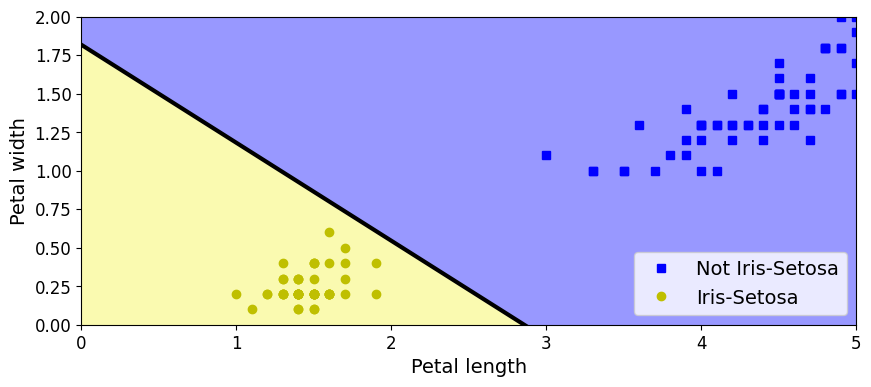

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

### Task 2
 Elaborate on the difference between a perceptron and logistic regression.

 **Hint:** Consider the nature of the boundary in the above plot.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 2 answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

# Activation functions

### Task 3
Describe the role of activation functions within a neural network. If you build <br>
a neural network with no activation function, which model that we've seen in <br>
this class would your network resemble?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 3 answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

# Building an Image Classifier

First let's import Pytorch. **Pytorch is a machine learning platform developed** <br>
**by Meta**. It is now a free, open-source platform.

In [6]:
torch.__version__

'2.5.1+cu124'

Let's start by loading the [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. Keras has a number <br>
of functions to load popular datasets in `keras.datasets`. **The dataset is** <br> **already split for you between a training set and a test set**, but it can be <br> useful to split the training set further to have a validation set.

Keras is another machine learning toolkit that acts as the python interface <br>
for tensorflow. We generally won't use it in this course other than for <br>
accessing some data collections.

In [7]:
import keras

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [9]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [10]:
X_train_full.dtype

dtype('uint8')

Let's **split the full training set into a validation set and a (smaller)** <br> **training set**. We also **scale the pixel intensities down to the 0-1 range** and <br>
convert them to floats, by dividing by 255. This is essentially min-max scaling <br>
or normalization for pixels with a maximum value of 255 and a minimum of 0.

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'` <br>
color map:

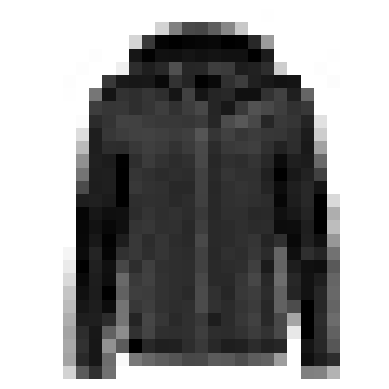

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [15]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

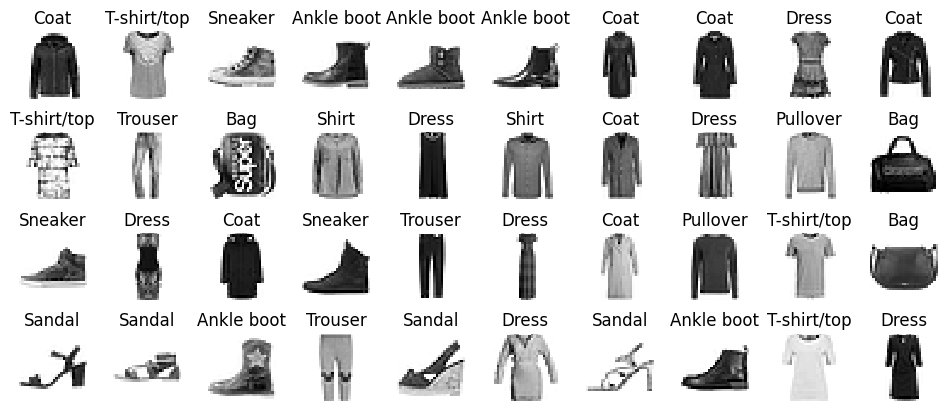

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Data Loaders:**
Pytorch is built on a data type called a tensor. Numpy arrays are not <br>
themselves tensors. So we'll use a *dataloader* to **convert our numpy arrays to** <br>
**tensors** and pass those to our pytorch model.

In [19]:
from torch.utils.data import Dataset, DataLoader

In [20]:
class MnistDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.copy()).float()
        self.y = torch.from_numpy(y.copy()).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [21]:
train_data = MnistDataset(X_train, y_train)
valid_data = MnistDataset(X_valid, y_valid)
test_data = MnistDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False)

Here's an [introductory tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) to using Datasets and Dataloaders in Pytorch that <br> you may find helpful.

## Defining a neural network using Pytorch:

In the cells below we  build an deep neural network model using the Pytorch <Br>
Sequential class. The input is an image of shape 28 by 28 whose dimensions are <br> reshaped to a flat 1d array of length $28^2=784$ by the `nn.Flatten` layer. <br>
The network consists of `Linear` layers (fully-connected multi-output <br> perceptrons) sandwiched between non-linear activations `ReLU` and `Softmax`.<br> The `Softmax` output activation function is used for multi-label classification. <br>
The layers are wrapped in a `nn.Sequential` function that executes each <br> operation in the given order when the `model` object is called. <br>

In [22]:
np.random.seed(42)
torch.manual_seed(42)

In [23]:
from torch import nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 300),
    nn.ReLU(),
    nn.Linear(300, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.Softmax(dim=1)
)

**This is essentially a multi-layer perceptron model with activation functions** <br>
to each "neuron". Additionally, **we no longer end the model with a decision** <br>
**function** that outputs either a 0 or 1. Here our final layer's **weights** <br>
**will be passed through a softmax function which will output a** <br>
**collection of 10 values which add up to 1**. These are the probabilities of each <br>
class being the correct class.

In [24]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=300, bias=True)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=100, bias=True)
  (4): ReLU()
  (5): Linear(in_features=100, out_features=10, bias=True)
  (6): Softmax(dim=1)
)


We can look at the layers directly:

In [25]:
hidden1 = model[1] # 1st hidden layer is at index 1

In [26]:
weights, biases = hidden1.weight, hidden1.bias

In [27]:
weights

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0283,  0.0160, -0.0331,  ..., -0.0214, -0.0285,  0.0025],
        [ 0.0149, -0.0222,  0.0158,  ...,  0.0002,  0.0009,  0.0010],
        [ 0.0060, -0.0062, -0.0113,  ...,  0.0222,  0.0135, -0.0049]],
       requires_grad=True)

In [28]:
weights.shape

torch.Size([300, 784])

In [29]:
biases

Parameter containing:
tensor([ 0.0206,  0.0060,  0.0232, -0.0270, -0.0098, -0.0182, -0.0304, -0.0039,
         0.0041,  0.0309, -0.0117,  0.0326,  0.0127, -0.0348, -0.0126, -0.0341,
        -0.0169, -0.0226, -0.0347,  0.0201,  0.0293, -0.0016, -0.0167,  0.0077,
         0.0332, -0.0142, -0.0279, -0.0221,  0.0331, -0.0055, -0.0130,  0.0019,
        -0.0034, -0.0280,  0.0010,  0.0137,  0.0272,  0.0116, -0.0218,  0.0247,
         0.0040, -0.0131, -0.0045, -0.0003, -0.0321, -0.0075,  0.0031, -0.0330,
         0.0140, -0.0321, -0.0045, -0.0035,  0.0332,  0.0188, -0.0277, -0.0120,
        -0.0268, -0.0152, -0.0327, -0.0103,  0.0282,  0.0170,  0.0344, -0.0027,
        -0.0096, -0.0202, -0.0189, -0.0084, -0.0194, -0.0327, -0.0287, -0.0225,
        -0.0017, -0.0080, -0.0102, -0.0216,  0.0171,  0.0219, -0.0348,  0.0229,
        -0.0177,  0.0216, -0.0281,  0.0350,  0.0019, -0.0181, -0.0004, -0.0327,
         0.0191,  0.0283, -0.0205, -0.0212,  0.0040,  0.0131, -0.0218,  0.0054,
         0.0006,  

In [30]:
biases.shape

torch.Size([300])

## Training loop in Pytroch
In pytorch we need to **create loops** that do things like **training** our model. <br>
Below is an example training loop that we'll use in this code. Each step is <br>
commented and it's **very important to understand this code** in order to use <br>
pytorch and other similar machine learning libraries.

In [31]:
def train_and_validate(train_loader, val_loader, model, optimizer, criterion, num_epochs, metric=None):
    history = {
        'epoch': [],
        'train_loss': [],
        'train_metric': [],
        'val_loss': [],
        'val_metric': []
    }  # Initialize a dictionary to store epoch-wise results

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        epoch_loss = 0.0  # Initialize the epoch loss and metric values
        epoch_metric = 0.0

        # Training loop
        for X, y in train_loader: # Iterate through train data loader
            optimizer.zero_grad()  # Clear existing gradients
            outputs = model(X)  # Make predictions

            #REPLACE THE FOLLOWING LINE FOR EXERCISE 8
            #loss = criterion(outputs.squeeze(-1), y)  # Compute the loss
            loss = criterion(outputs, y)  # Compute the loss

            loss.backward()  # Compute gradients
            optimizer.step()  # Update model parameters

            epoch_loss += loss.item() # Add up loss across each batch in the epoch
            if metric is not None: # Check whether you've passed a loss metric
                epoch_metric += metric(outputs, y) # Compute metric value
            else:
                epoch_metric += 0 # If no metric, append 0

        # Average training loss and metric
        epoch_loss /= len(train_loader)
        epoch_metric /= len(train_loader)

        # Validation loop
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation
            val_loss = 0.0
            val_metric = 0.0
            for X_val, y_val in val_loader:
                outputs_val = model(X_val)  # Make predictions

                #REPLACE THE FOLLOWING LINE FOR EXERCISE 8
                #val_loss += criterion(outputs_val.squeeze(-1), y_val).item()  # Compute the loss
                val_loss += criterion(outputs_val, y_val).item()  # Compute loss

                if metric is not None:
                    val_metric += metric(outputs_val, y_val)
                else:
                    val_metric += 0

            val_loss /= len(val_loader)
            val_metric /= len(val_loader)

        # Append epoch results to history
        history['epoch'].append(epoch)
        history['train_loss'].append(epoch_loss)
        history['train_metric'].append(epoch_metric)
        history['val_loss'].append(val_loss)
        history['val_metric'].append(val_metric)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, '
              f'Train Metric: {epoch_metric:.4f}, Val Loss: {val_loss:.4f}, '
              f'Val Metric: {val_metric:.4f}')

    return history, model

**Model parameters:**
Here, we choose the **"sgd" optimizer**. The SGD optimizer is a derivative of <br>
the SGD algorithm but, instead of updating coefficients for a linear <br> regression as we saw in previous exercises, we compute the **gradient of our** <br>
**loss function** (sparse categorical crossentropy) **with respect to our model** <br>
**weights and layer biases** and use that to update our weights and biases. Note <br>
that our gradient will now be the sum of more complicated partial <br>
derivatives. Note that **our gradient will now be the sum of more complicated** <br>
**partial derivatives**. $\partial L/\partial w_i = (\partial L / \partial f(w_i)) (\partial f(w_i) / \partial w_i)$ where <br>
$f(w_i) = ReLU(w_ix_i + b)$. Additionally we may have a partial derivative for <br>
our bias term $\partial L/\partial b$. The total gradient for stochastic gradient descent will then be <br>
$\nabla L_{layer} = \Sigma_i \partial L/\partial w_i + \partial L/\partial b$.

In [32]:
criterion = torch.nn.CrossEntropyLoss() # This is a loss function/criterion
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # This updates model weights

def accuracy_metric(pred, target): # This is an accuracy metric
    if pred.shape[1] > 1: # "Accuracy" calcuation is different depending on # of classes
        pred = pred.argmax(dim=1)
        accuracy = torch.sum(pred == target).item() / len(pred)
    else:
        accuracy = torch.sum(pred > 0.5 == target).item() / len(pred)
    return accuracy

Now let's train the model for 30 epochs.

We save the most crucial parameters (`['loss', 'accuracy', 'val_loss',` <br> '`val_accuracy']`) in a dictionary named "history".

In [33]:
# Here we train the model and then return the training history and trained model
history, model = train_and_validate(train_loader, valid_loader, model,
                                    optimizer=optimizer, criterion=criterion,
                                    num_epochs=30, metric=accuracy_metric)

Epoch [1/30], Train Loss: 2.2993, Train Metric: 0.2244, Val Loss: 2.2947, Val Metric: 0.3475
Epoch [2/30], Train Loss: 2.2869, Train Metric: 0.3563, Val Loss: 2.2752, Val Metric: 0.3530
Epoch [3/30], Train Loss: 2.2372, Train Metric: 0.3208, Val Loss: 2.1675, Val Metric: 0.3412
Epoch [4/30], Train Loss: 2.0716, Train Metric: 0.4775, Val Loss: 1.9794, Val Metric: 0.5487
Epoch [5/30], Train Loss: 1.9373, Train Metric: 0.5767, Val Loss: 1.8899, Val Metric: 0.6286
Epoch [6/30], Train Loss: 1.8712, Train Metric: 0.6273, Val Loss: 1.8493, Val Metric: 0.6325
Epoch [7/30], Train Loss: 1.8431, Train Metric: 0.6333, Val Loss: 1.8294, Val Metric: 0.6422
Epoch [8/30], Train Loss: 1.8257, Train Metric: 0.6539, Val Loss: 1.8139, Val Metric: 0.6746
Epoch [9/30], Train Loss: 1.8090, Train Metric: 0.6837, Val Loss: 1.7965, Val Metric: 0.6998
Epoch [10/30], Train Loss: 1.7925, Train Metric: 0.7006, Val Loss: 1.7818, Val Metric: 0.7091
Epoch [11/30], Train Loss: 1.7795, Train Metric: 0.7091, Val Loss: 1.

In [34]:
print(history.keys())

dict_keys(['epoch', 'train_loss', 'train_metric', 'val_loss', 'val_metric'])


In [35]:
print(history['epoch'])
print(history['train_loss'])
print(history['train_metric'])
print(history['val_loss'])
print(history['val_metric'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[2.299255026772965, 2.2869284840517268, 2.2372200128644013, 2.0715981857721197, 1.9372768113779468, 1.8711816965147505, 1.8430550411690114, 1.8256678121034489, 1.80900295640147, 1.7925438666066458, 1.779526698589325, 1.769691792199778, 1.7623358999573908, 1.7568707409293152, 1.7523392612157866, 1.748844196768694, 1.745989260424015, 1.7434659591940946, 1.7413751172464946, 1.7394768798074056, 1.7377510845661164, 1.736477952918341, 1.7349662062733673, 1.7335456074670303, 1.7326628113901892, 1.7315952174885327, 1.7306757070297418, 1.7298972662105117, 1.7290010549301325, 1.7280245229255322]
[0.22443071705426357, 0.3563408430232558, 0.3207848837209302, 0.47748304263565894, 0.5767139050387596, 0.6273013565891472, 0.6333333333333333, 0.6539244186046511, 0.6837148740310077, 0.7006177325581395, 0.7091388081395349, 0.7141593992248062, 0.717296511627907, 0.719858284883721, 0.7225654069767

Let's visualize the learning curves for this model training.

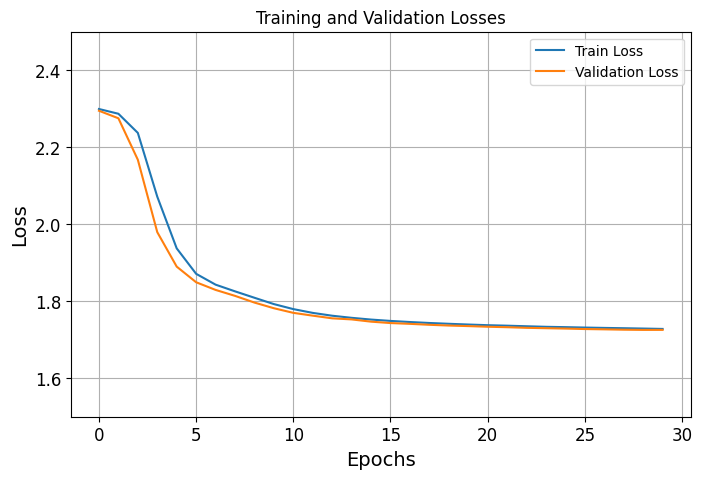

In [36]:
import pandas as pd

losses = pd.DataFrame({
    'Train Loss': history['train_loss'],
    'Validation Loss': history['val_loss']
})

# Plotting
losses.plot(figsize=(8, 5))
plt.grid(True)
plt.title("Training and Validation Losses")
plt.gca().set_ylim(1.5, 2.5)  # Adjust the y-axis limits if needed
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

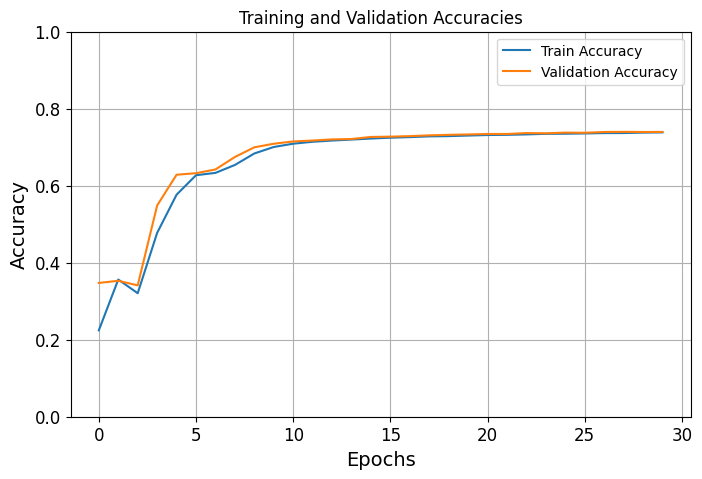

In [37]:
accuracies = pd.DataFrame({
    'Train Accuracy': history['train_metric'],
    'Validation Accuracy': history['val_metric']
})

# Plotting
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.title("Training and Validation Accuracies")
plt.gca().set_ylim(0, 1)  # Adjust the y-axis limits if needed
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## Testing loop
We also need to create a testing loop if we want to check the performance of <br>
our model after we train it. Notice a few key things:
1. We put the model into evaluation mode instead of training mode
2. We run the model without computing any gradients
3. There is no more optimizer needed

We also did this with the validation portion of `train_and_validate` loop.

In [38]:
def test_model(model, data_loader, criterion, metric):
    model.eval()  # Set the model to evaluation mode

    total_loss = 0.0  # Initialize the total loss and metric values
    total_metric = 0.0

    with torch.no_grad():  # Disable gradient tracking
        for batch in data_loader:
            X, y = batch

            # Pass the data to the model and make predictions
            outputs = model(X)

            # Compute the loss
            loss = criterion(outputs, y)

            # Add the loss and metric for the batch to the total values
            total_loss += loss.item()
            total_metric += metric(outputs, y)

    # Average loss and metric for the entire dataset
    avg_loss = total_loss / len(data_loader)
    avg_metric = total_metric / len(data_loader)

    print(f'Test Loss: {avg_loss:.4f}, Test Metric: {avg_metric:.4f}')

    return avg_loss, avg_metric

### Task 4
 Validate your model using `test_model` using the test dataloader `test_loader`.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
# evaluate model on  test set

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

### Task 5
Select the first three samples from the test dataset not the dataloader and
<br>
predict their corresponding classes using: <br>
**`prediction = model(torch.from_numpy(X_new).float())`**. Then print the <br>
names/ categories of the elements in  question (Eg. "Pants", "trouser")

You'll need to use **`prediction.detach().numpy()`** to get the outputs in a nice <br>
numpy format. **Pay attention to the above steps to avoid data type errors.**

Also, use `np.argmax(prediction, axis=-1)` on the one-hot-encoded predicitons <br>
to get the classes numbers.

In [ ]:
X_new = X_test[:3]

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [ ]:
y_test[0:3]

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

We can also build multi-layer perceptrons for regression. The difference here <br>
is that we remove features like softmax that are specific to multi-class <br>
classification and instead end with an appropriately sized linear layer and <br>
use mean-squared-error as our loss function instead of cross-entropy loss.

Let's load, split and scale the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


### Task 6
 Scale your training, validation, and test feature matrices using scikit-learn's <br>
[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Best practice is to fit your scaler to either the full dataset <br>
or a large subset e.g. X_train and scale all samples using the same means and <br>
standard deviations. It is critical that you **use the same mean and standard**<br>
**deviation for all data**. This standard scaler is implementing <br> standardization also sometimes referred to as standard normalization.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
#scaler =
#scaler = scaler.fit(X_train)
#X_train =
#X_valid =
#X_test =

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

###Task 7

Create a dataloader for the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

Be sure to use appropriate data types for the inputs (X) and outputs (y).

**Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) for this dataset. If you use the wrong data type** <br>
**in your \_\_getitem\_\_ function then the code will not work properly.**

You must include the functions `__init__`, `__len__`, and `__getitem__`. <br> Then, create your data sets and data loaders with `batch_size=64`.

####Task 7 Question:

What are the appropriate data types for the inputs X and outputs y according <br>
to the California housing dataset documentation?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Answer:

In [ ]:
# class CaliHousingDataset(Dataset):
#     def __init__(
#     def __len__(
#     def __getitem__(

In [ ]:
# train_data = CaliHousingDataset(
# test_data = CaliHousingDataset(
# valid_data = CaliHousingDataset(
# train_loader = DataLoader(train_data
# test_loader = DataLoader(test_data
# valid_loader = DataLoader(valid_data

In [ ]:
np.random.seed(42)
torch.manual_seed(42)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

### Task 8
This is a Neural Network with one hidden layer with 30 neurons. The output
<br>
layer has one neuron, which is the regression value. **Create a** <br> **train_and_validate loop for this model. Build the model, and train it using** <br>
**the SGD optimizer with a learning rate of 1e-2 for 30 epochs.**

This task is similar to task 5 except that we now do **regression, NOT** <br> **classification**. There will be some changes like no longer passing an accuracy <br>
metric since that's not a regression metric. We'll also remove the softmax <br>
which is used for multi-class classification. Finally, we'll need to use an <br>
[appropriate loss function](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

Read through the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) documentation to determine the <br>
correct number of features and classes for the model.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
# # Note: No flatten layer or softmax layer and last dimension should be 1
# model = nn.Sequential(
#     #Linear layer that connects input features to 30 neurons
#     #ReLU activation function
#     #Linear layer that connects 30 hidden dims to classes
# )

In [ ]:
# # Note: No metric needed and remember to change the loss function
# def train_and_validate(train_loader, val_loader, model, optimizer,
#                       criterion, num_epochs, metric=None):


# ...
# history, model =

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [ ]:
losses = pd.DataFrame({
    'Train Loss': history['train_loss'],
    'Validation Loss': history['val_loss']
})

# Plotting
losses.plot(figsize=(8, 5))
plt.grid(True)
plt.title("Training and Validation Losses")
plt.gca().set_ylim(1.5, 2.5)  # Adjust the y-axis limits if needed
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Task 9.1
Create a `test_model` function and evalute your model's performance by using <br>
it on the test set. Also predict one element of the test set of your choice <br>
(`X_test[42]` for example) and compare to the real value. You can look at the <br>
validation part of the `test_model` function from before as a reference for <br>
how to create a test loop.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
#def test_model(model, data_loader, criterion):

In [ ]:
#test_prediction =

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Saving the model weights for future use

Refer to the example on saving files in the course Resources folder on github

### Task 9.2

Create a new blank model using the same architecture you used from part 8. <br>
Load the model weights from your previously trained model from part 8. <br> Finally, compare the predictions of the two models on the same datapoint.

In [ ]:
model(torch.from_numpy(X_test[42:43].copy()).float())

In [ ]:
torch.save(model.state_dict(), "my_pytorch_model")

In [ ]:
#model_reloaded = #Insert the same Sequential model architecture from part 8

In [ ]:
model_reloaded.load_state_dict(torch.load("my_pytorch_model"))

In [ ]:
model_reloaded(torch.from_numpy(X_test[42:43].copy()).float())

Are these the same prediction?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 9.2 answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

# Model Layer Naming

For particularly large models or new architectures, it can be helpful to name <br>
model layers or blocks so that you can identify the source of bugs, etc.

In [ ]:
from collections import OrderedDict

In [ ]:
model_with_layer_naming = torch.nn.Sequential(OrderedDict([
          ('simple_linear_layer_1', nn.Linear(10,100)),
          ('a_neat_activation_function', nn.ReLU()),
        ]))

In [ ]:
print(model_with_layer_naming)

In [ ]:
print(model_with_layer_naming.simple_linear_layer_1)

### Task 10 (Bonus: 3 points)
 For `X_train[0]` perform the forward pass yourself using matrix <br> multiplications.
Remember to include the biases. <br>
Check with the prediction of the model that you get exactly the same! <br>

Hints:
- use `np.dot(x,y)` for matrix multiplication
- for the first layer it would look like this:
    * matrix mult: `X_new` dot `l1`
    * add bias `b1`
    * apply `relu(...)`

In [ ]:
print(model)

In [ ]:
l1 = np.array(model[0].weight.data.numpy()).T
b1 = np.array(model[0].bias.data.numpy())
l2 = np.array(model[2].weight.data.numpy()).T
b2 = np.array(model[2].bias.data.numpy())

In [ ]:
X_new = X_train[0]

In [ ]:
X_new.shape

In [ ]:
l1.shape

In [ ]:
b1.shape

In [ ]:
# This is the entirety of the ReLU function. How cool is that!
def relu(z):
    return np.maximum(0, z)

In [ ]:
model(torch.from_numpy(X_new).float().unsqueeze(0))   # reproduce this!

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
#x =
#print(x)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above